In [21]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import sys
import numpy as np
import skimage as sk
import skimage.io as skio

In [88]:
def plotgray(img,cmap='gray',tit=''):
    fig = plt.figure()
    fig.set_size_inches(10,10)
    plt.imshow(img, cmap=cmap)
    plt.title(tit)
    plt.show(fig)
def plot3ch(img):
    fig = plt.figure()
    fig.set_size_inches(10,10)
    plt.imshow(img)
    plt.show(fig)

### Part I

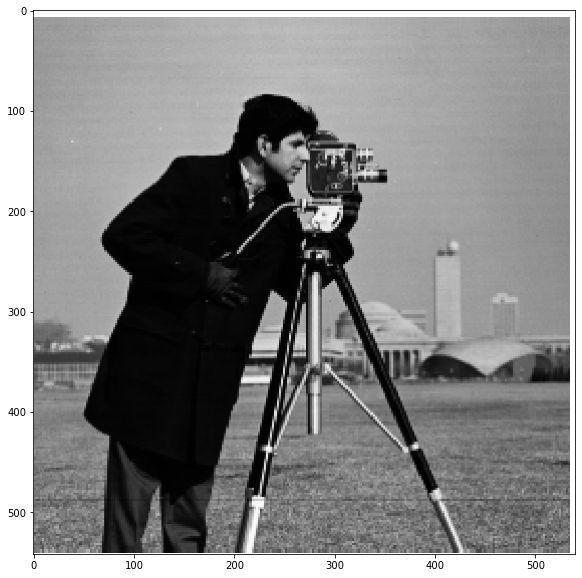

In [89]:
imname ='cameraman.png'
img = skio.imread(imname, as_gray=True)
img = sk.img_as_float(img)
plotgray(img)

#### Part (1.1) Finite Difference Operator

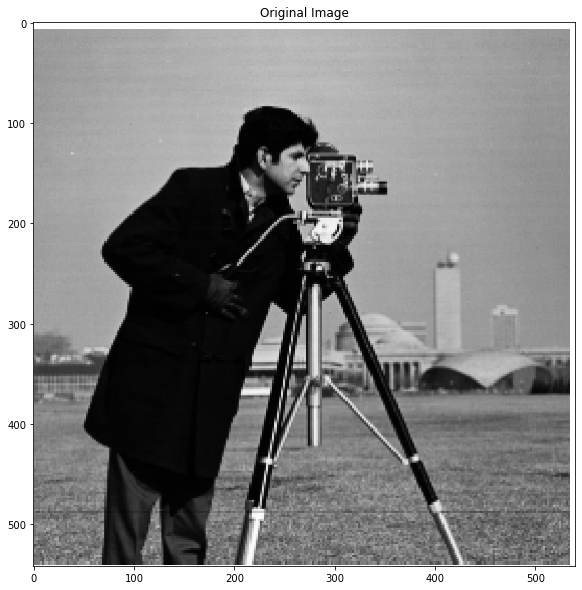

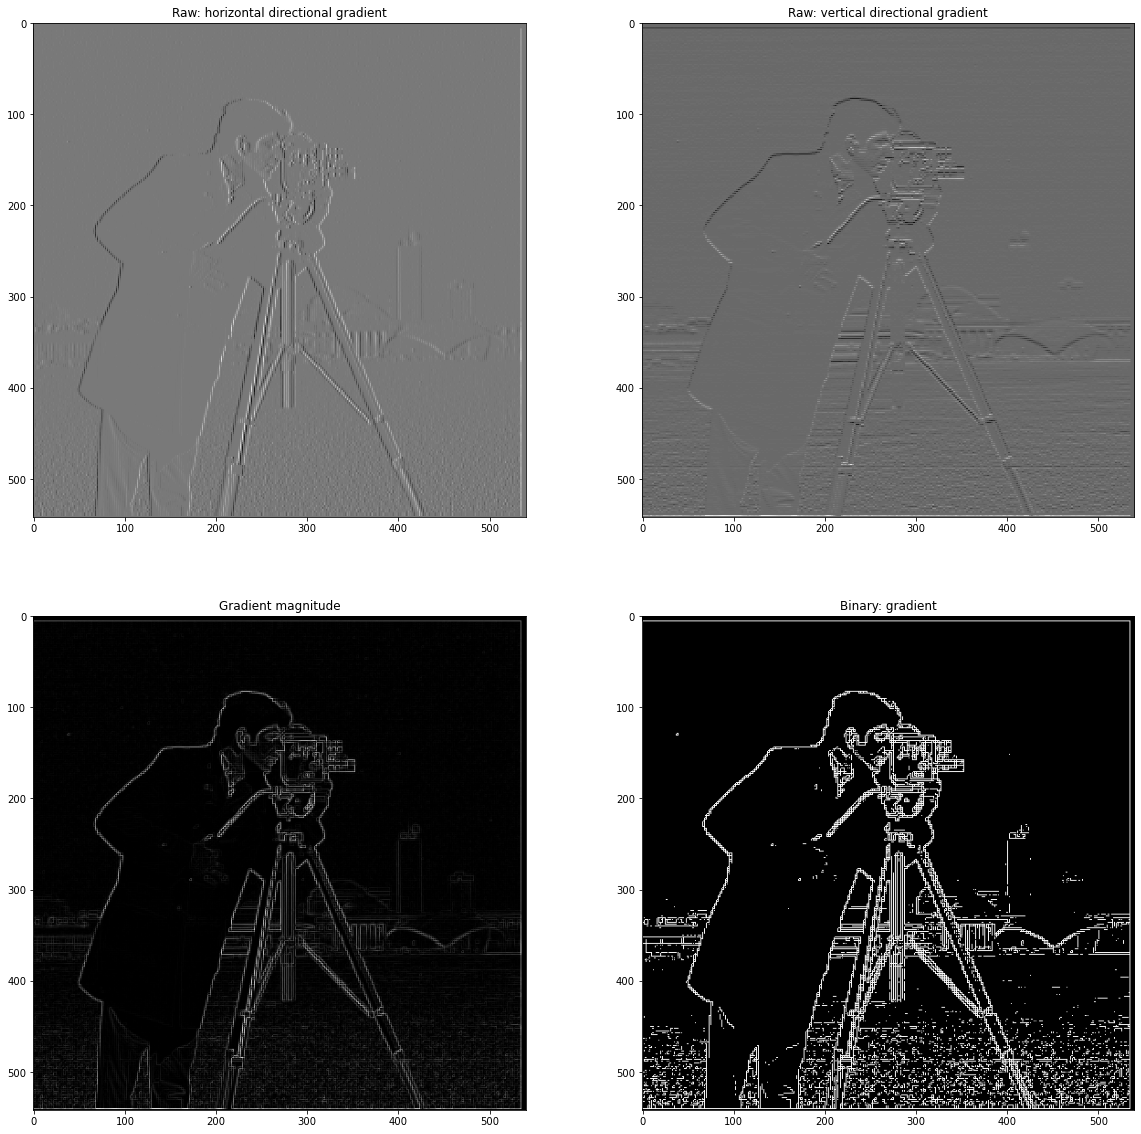

In [91]:
def get_grad(img,t=0.1):
    Dy = np.array([[1,-1]])
    Dx = np.array([[1],[-1]])

    img1 = ndimage.convolve(img,Dy,mode='reflect')
    img2 = ndimage.convolve(img,Dx,mode='reflect')

    fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
    ax[0,0].imshow(img1,cmap='gray')
    ax[0,0].set_title('Raw: horizontal directional gradient')
    ax[0,1].imshow(img2,cmap='gray')
    ax[0,1].set_title('Raw: vertical directional gradient')

    img3 = np.sqrt(img1**2+img2**2)
    ax[1,0].imshow(img3,cmap='gray')
    ax[1,0].set_title('Gradient magnitude')
    ax[1,1].imshow(np.where(img3>=t,1.0,0.0),cmap='gray')
    ax[1,1].set_title('Binary: gradient')
    
plotgray(img,tit='Original Image')
get_grad(img)

#### Part (1.2)

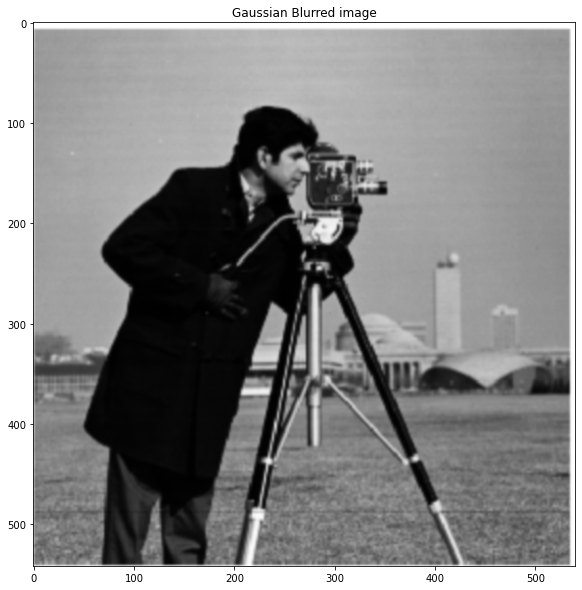

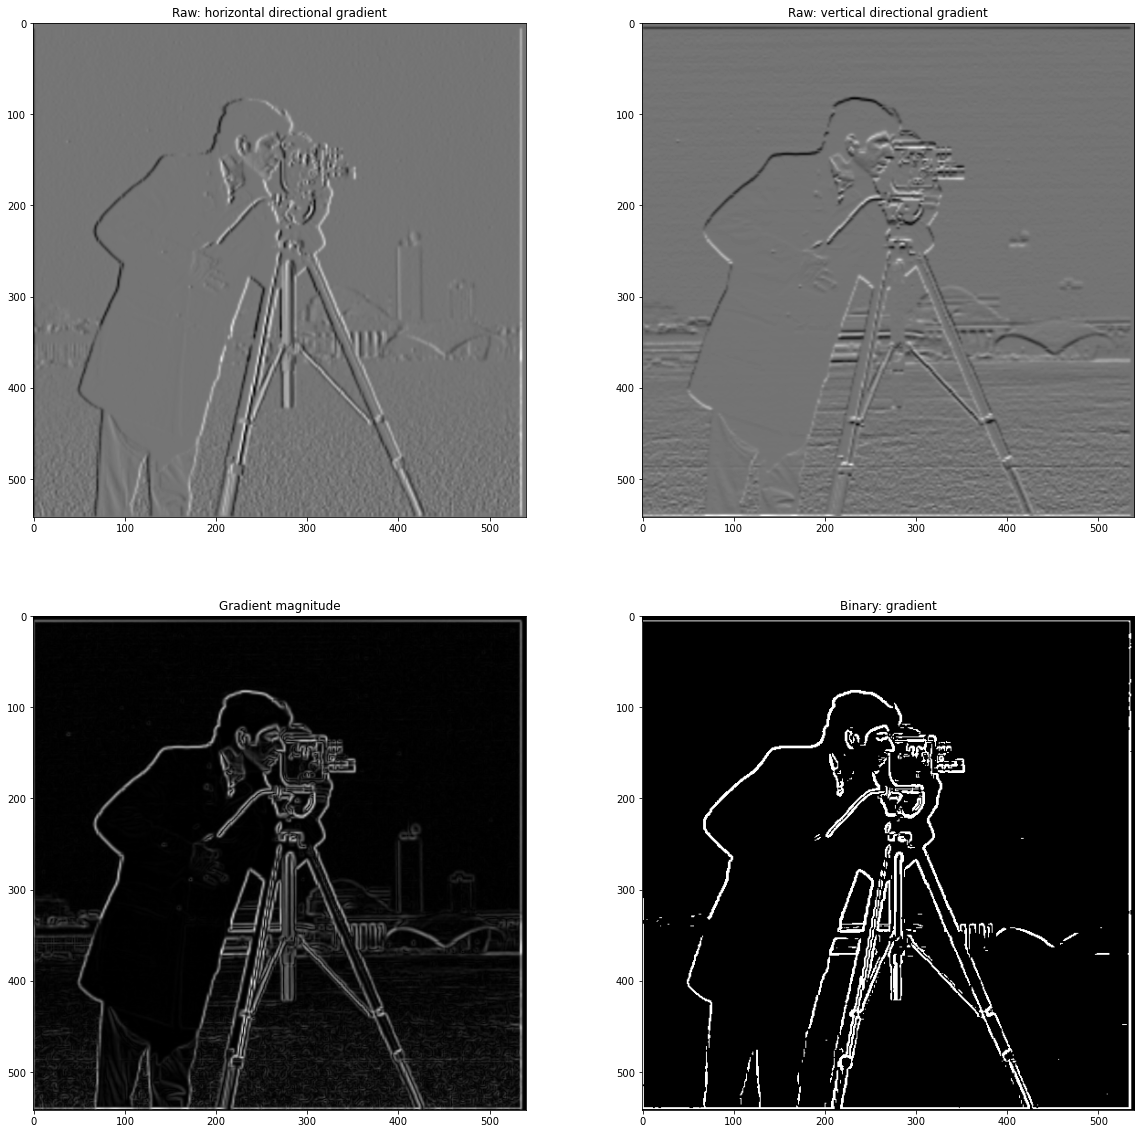

In [92]:
# gaussian filter from scratch
def gauss2D(sigma):
    ss = 2*np.ceil(sigma*3)+1
    m=n=(ss-1.)/2.
    x,y = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

g = gauss2D(sigma=1.0)
img_blur = ndimage.convolve(img,g,mode='reflect')
plotgray(img_blur,tit='Gaussian Blurred image')
get_grad(img_blur)

# convolve on gaussian filter first

In [97]:
def get_grad_magnitude(img,t=0.1):
    Dy = np.array([[1,-1]])
    Dx = np.array([[1],[-1]])
    img1 = ndimage.convolve(img,Dy,mode='reflect')
    img2 = ndimage.convolve(img,Dx,mode='reflect')
    img3 = np.sqrt(img1**2+img2**2)
    return np.where(img3>t,1.0,0.0)

Text(0.5, 1.0, '1 Convolution with image')

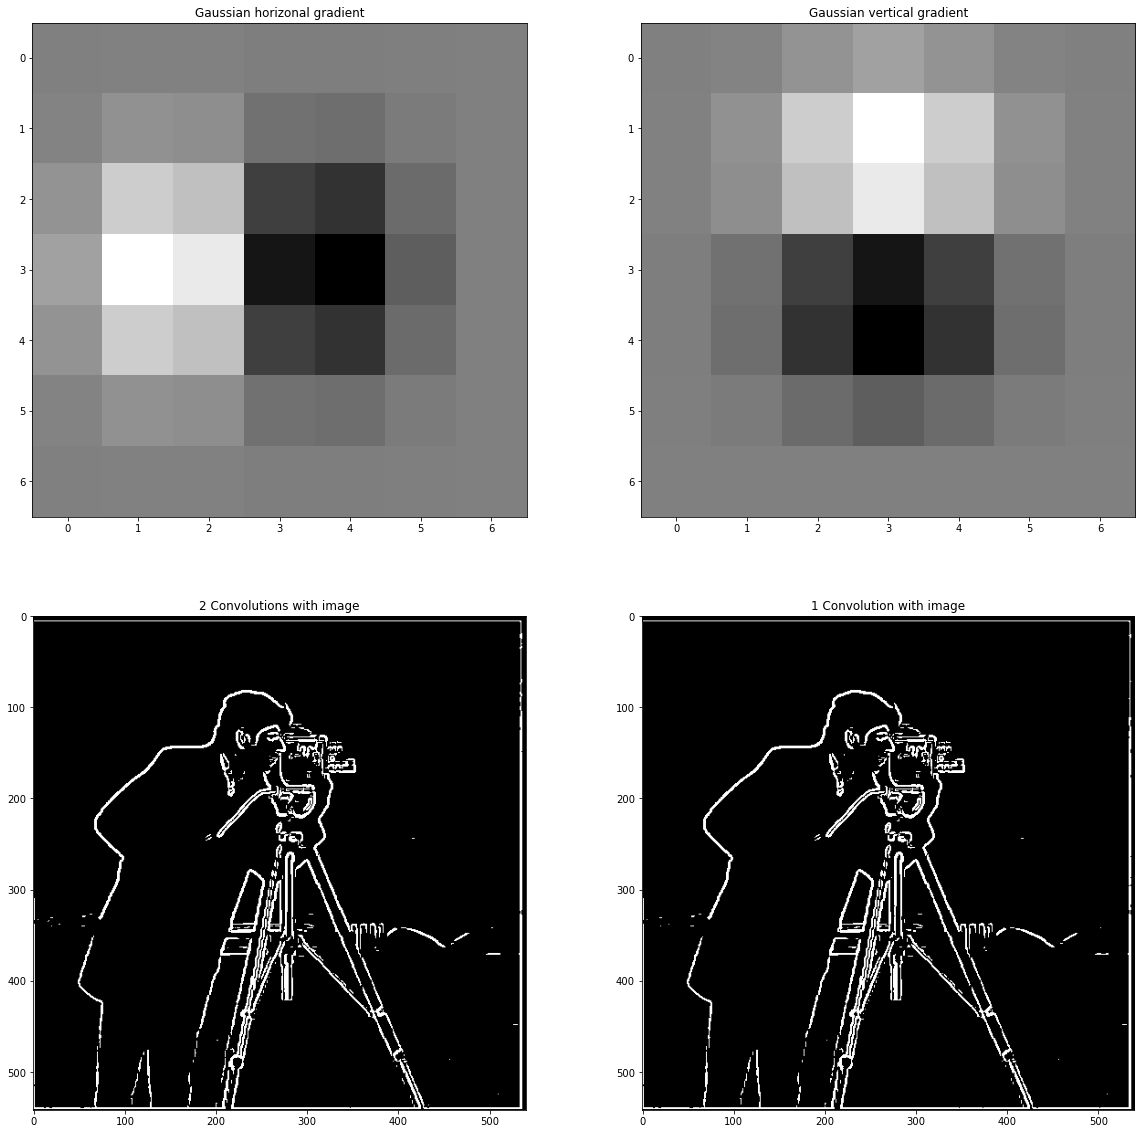

In [100]:
Dy = np.array([[1,-1]])
Dx = np.array([[1],[-1]])

gDy = ndimage.convolve(g,Dy,mode='reflect')
gDx = ndimage.convolve(g,Dx,mode='reflect')

img3 = get_grad_magnitude(img_blur,t=0.1)
dy = ndimage.convolve(img,gDy,mode='reflect')
dx = ndimage.convolve(img,gDx,mode='reflect')
mag_grad = np.sqrt(dy**2+dx**2)
img4 = np.where(mag_grad>0.1,1.0,0.0)



fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0,0].imshow(gDy,cmap='gray')
ax[0,0].set_title('Gaussian horizonal gradient')
ax[0,1].imshow(gDx,cmap='gray')
ax[0,1].set_title('Gaussian vertical gradient')

ax[1,0].imshow(img3,cmap='gray')
ax[1,0].set_title('2 Convolutions with image')
ax[1,1].imshow(img4,cmap='gray')
ax[1,1].set_title('1 Convolution with image')

### Part II
#### Part 2.1: Image "Sharpening"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sharpened Image')

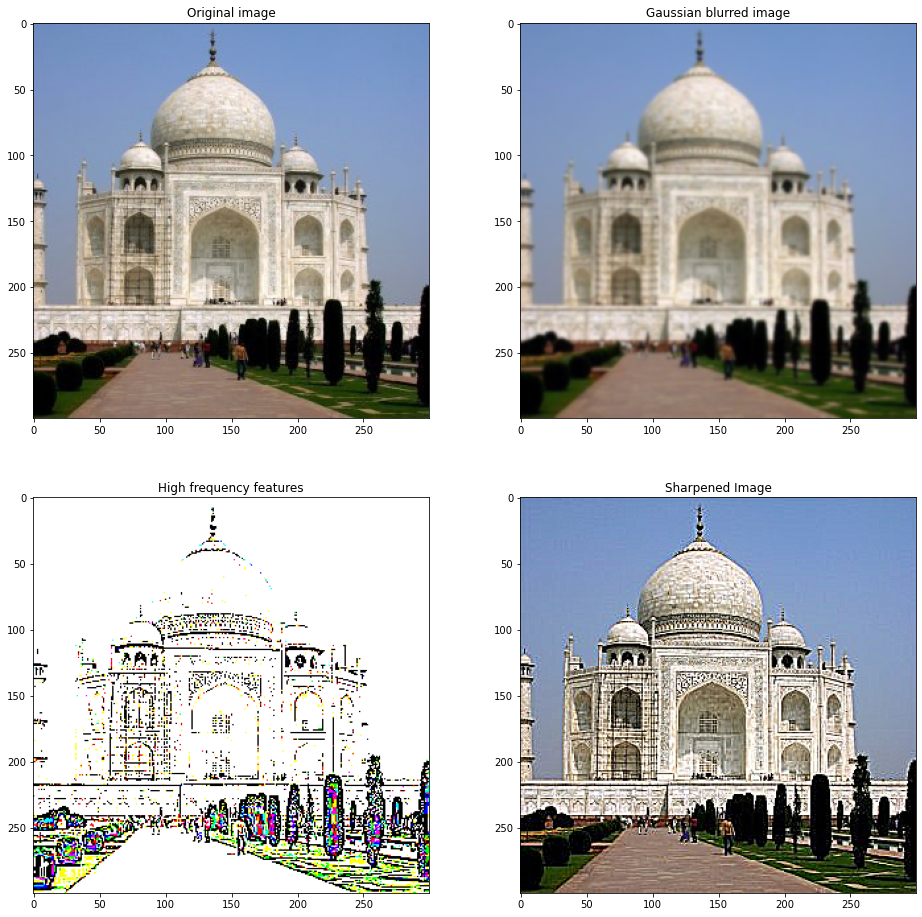

In [122]:
imname ='taj.jpeg'
img = skio.imread(imname)
img = sk.img_as_float(img)

r1=0.9
r2=0.9

g = gauss2D(sigma=1.0)
img_blur = ndimage.convolve(img,g[:,:,np.newaxis],mode='reflect')

high_freq = img - r1*img_blur
sharp_img = (1-r2)*img_blur + r2*high_freq

fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
ax[0,0].imshow(img)
ax[0,0].set_title('Original image')
ax[0,1].imshow(img_blur)
ax[0,1].set_title('Gaussian blurred image')

ax[1,0].imshow(np.where(high_freq<0,0.0,1))
ax[1,0].set_title('High frequency features')
ax[1,1].imshow(sharp_img/(1-r1*r2))
ax[1,1].set_title('Sharpened Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


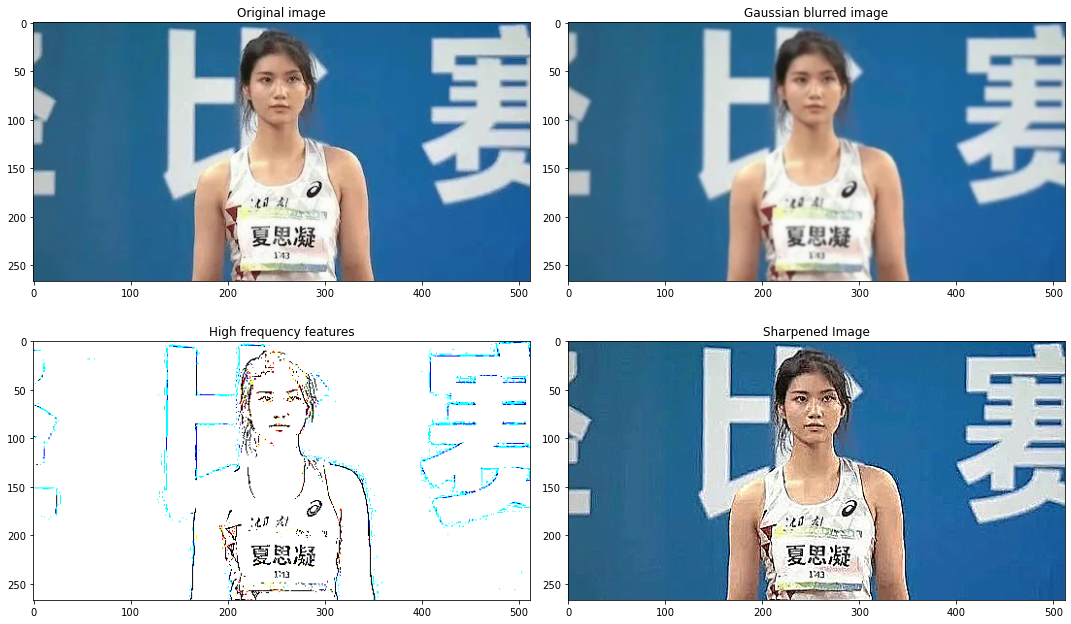

In [133]:
imname ='sining.jpeg'
img = skio.imread(imname)
img = sk.img_as_float(img)

r1=0.9
r2=0.9

g = gauss2D(sigma=1.0)
img_blur = ndimage.convolve(img,g[:,:,np.newaxis],mode='reflect')

high_freq = img - r1*img_blur
sharp_img = (1-r2)*img_blur + r2*high_freq

fig,ax = plt.subplots(nrows=2, ncols=2,figsize=(15,9))
ax[0,0].imshow(img)
ax[0,0].set_title('Original image')
ax[0,1].imshow(img_blur)
ax[0,1].set_title('Gaussian blurred image')
ax[1,0].imshow(np.where(high_freq<0,0.0,1))
ax[1,0].set_title('High frequency features')
ax[1,1].imshow(sharp_img/(1-r1*r2))
ax[1,1].set_title('Sharpened Image')
fig.tight_layout()
plt.show()

#### Part 2.2: Hybrid Images
1. The aligned image is obtained through running the 'whatup.py' file, where user can provide the two images' directory and hand-picked two points on each images for alignment.
2. The resulting aligned images will get saved, and I show the operations from there.

Text(0.5, 1.0, 'FFT Hybrid')

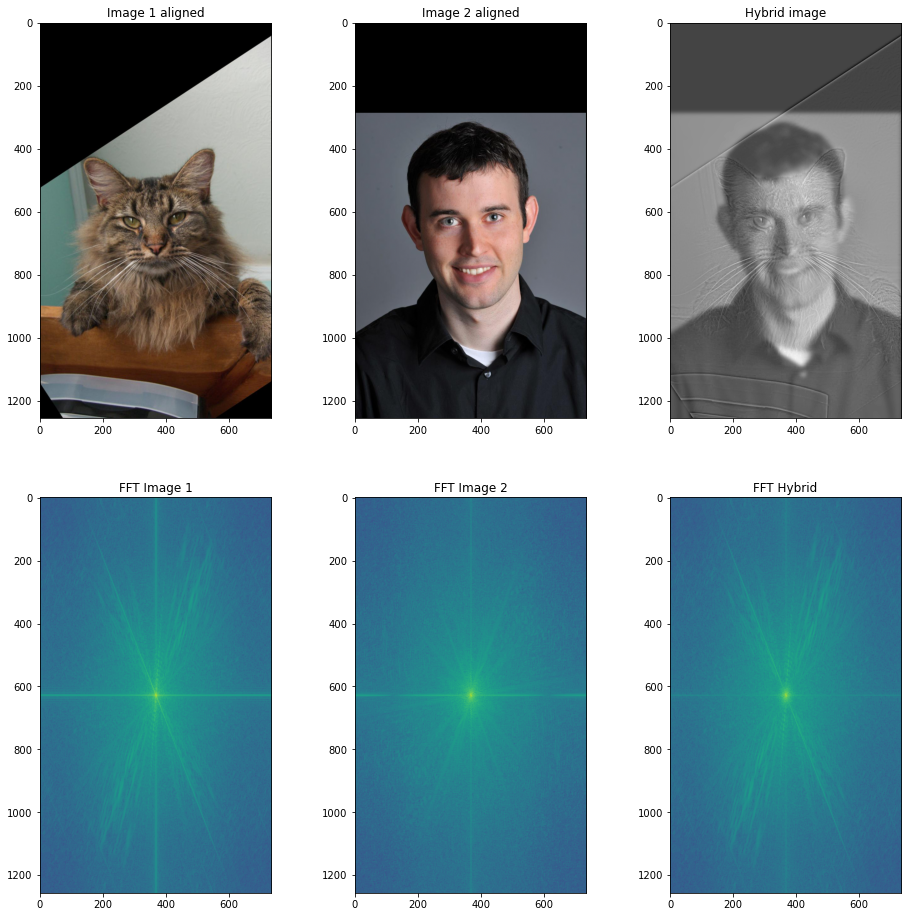

In [140]:
alimg1 = skio.imread('hybrid/alimg1.jpg')
alimg2 = skio.imread('hybrid/alimg2.jpg')
img1 = sk.img_as_float(alimg1)
img2 = sk.img_as_float(alimg2)
from scipy import ndimage

r1=1.0
sig1,sig2 = 4.0,6.0
wlow = 0.5

g1 = gauss2D(sigma=sig1)
img1_low = ndimage.convolve(img1,g1[:,:,np.newaxis],mode='reflect')
img1_high = img1 - r1*img1_low
g2 = gauss2D(sigma=sig2)
img2_low = ndimage.convolve(img2,g2[:,:,np.newaxis],mode='reflect')
img2_high = img2 - r1*img2_low

img_hybrid = (wlow*img1_low + (1-wlow)*img2_high) / (2-r1)
img_hybrid1 = (wlow*img2_low + (1-wlow)*img1_high) / (2-r1)

fig,ax = plt.subplots(nrows = 2, ncols=3, figsize=(16, 16))
ax[0,0].imshow(img1)
ax[0,0].set_title('Image 1 aligned')
ax[0,1].imshow(img2)
ax[0,1].set_title('Image 2 aligned')
ax[0,2].imshow(img_hybrid1[:,:,2],cmap='gray')
ax[0,2].set_title('Hybrid image')
ax[1,0].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(img1[:,:,2])))))
ax[1,0].set_title('FFT Image 1')
ax[1,1].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(img2[:,:,2])))))
ax[1,1].set_title('FFT Image 2')
ax[1,2].imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(img_hybrid1[:,:,2])))))
ax[1,2].set_title('FFT Hybrid')

Text(0.5, 1.0, 'Hybrid Image')

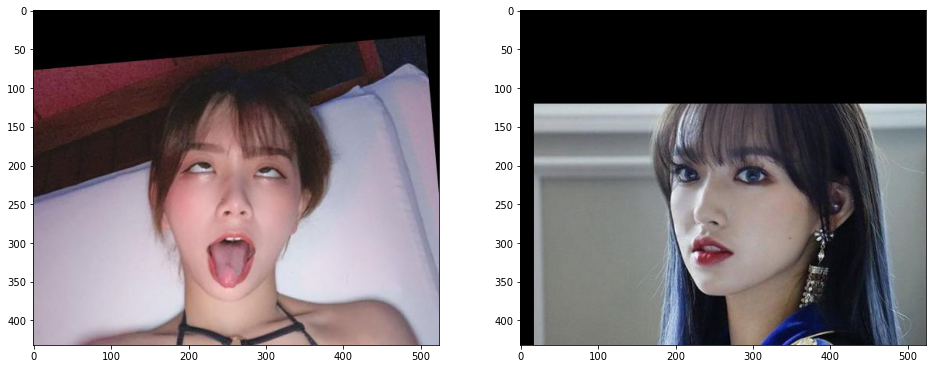

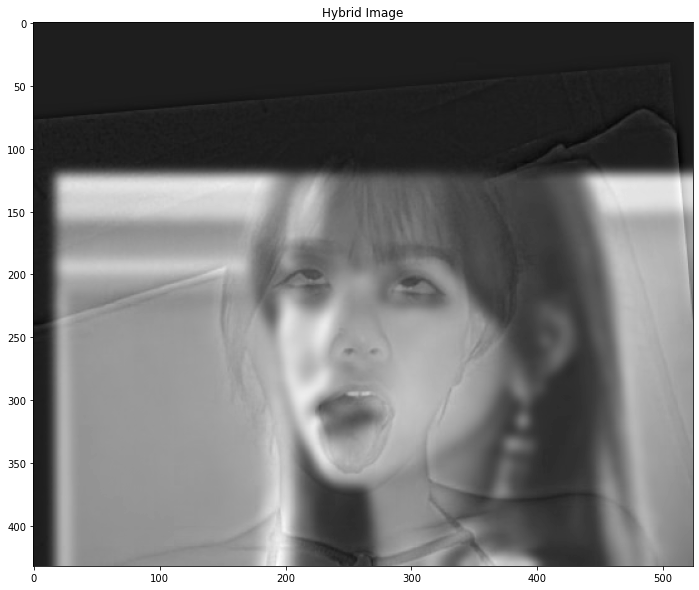

In [178]:
from scipy import ndimage

alimg1 = skio.imread('hybrid/alimg1-2.jpg')
alimg2 = skio.imread('hybrid/alimg2-2.jpg')
img1 = sk.img_as_float(alimg1)
img2 = sk.img_as_float(alimg2)

sig1,sig2 = 4.0,4.0
def hybrid_image(img1, img2, sigma1=4.0, sigma2=4.0, wlow = 0.7, r1=1.0):
    g1 = gauss2D(sigma=sig1)
    img1_low = ndimage.convolve(img1,g1[:,:,np.newaxis],mode='reflect')
    img1_high = img1 - r1*img1_low
    g2 = gauss2D(sigma=sig2)
    img2_low = ndimage.convolve(img2,g2[:,:,np.newaxis],mode='reflect')
    img2_high = img2 - r1*img2_low
    img_hybrid1 = (wlow*img2_low + (1-wlow)*img1_high) / (2-r1)
    return img_hybrid1[:,:,2]

fig,ax = plt.subplots(ncols=2,figsize=(16,10))
ax[0].imshow(img1)
ax[1].imshow(img2)

img_hybrid = hybrid_image(img1,img2)
fig,ax = plt.subplots(figsize=(16, 10))
plt.imshow(img_hybrid,cmap='gray')
plt.title('Hybrid Image')

#### Part 2.3: Gaussian and Laplacian Stacks

In [193]:
# number of levels
# Gaussian Stacks: First layer is the original image / Use guassian blur the previous layer repeatedly
# Laplacian Stack: Each layer of the laplacian stack is the result of subtract two adjacent gaussian layers
#                  The last layer is the last layer of the gaussian stack
N = 5
sig = 2.0
def pyramids(img,N=5,sig=2.0):
    g = gauss2D(sigma=sig)
    gs = []
    ls = []
    gs.append(img)
    for i in range(1,N):
        curr = gs[-1]
        if len(img.shape)==3:
            gs.append(ndimage.convolve(curr,g[:,:,np.newaxis],mode='reflect'))
        else:
            gs.append(ndimage.convolve(curr,g,mode='reflect'))
    for i in range(N-1):
        ls.append(gs[i]-gs[i+1])
    ls.append(gs[-1])
    return gs,ls

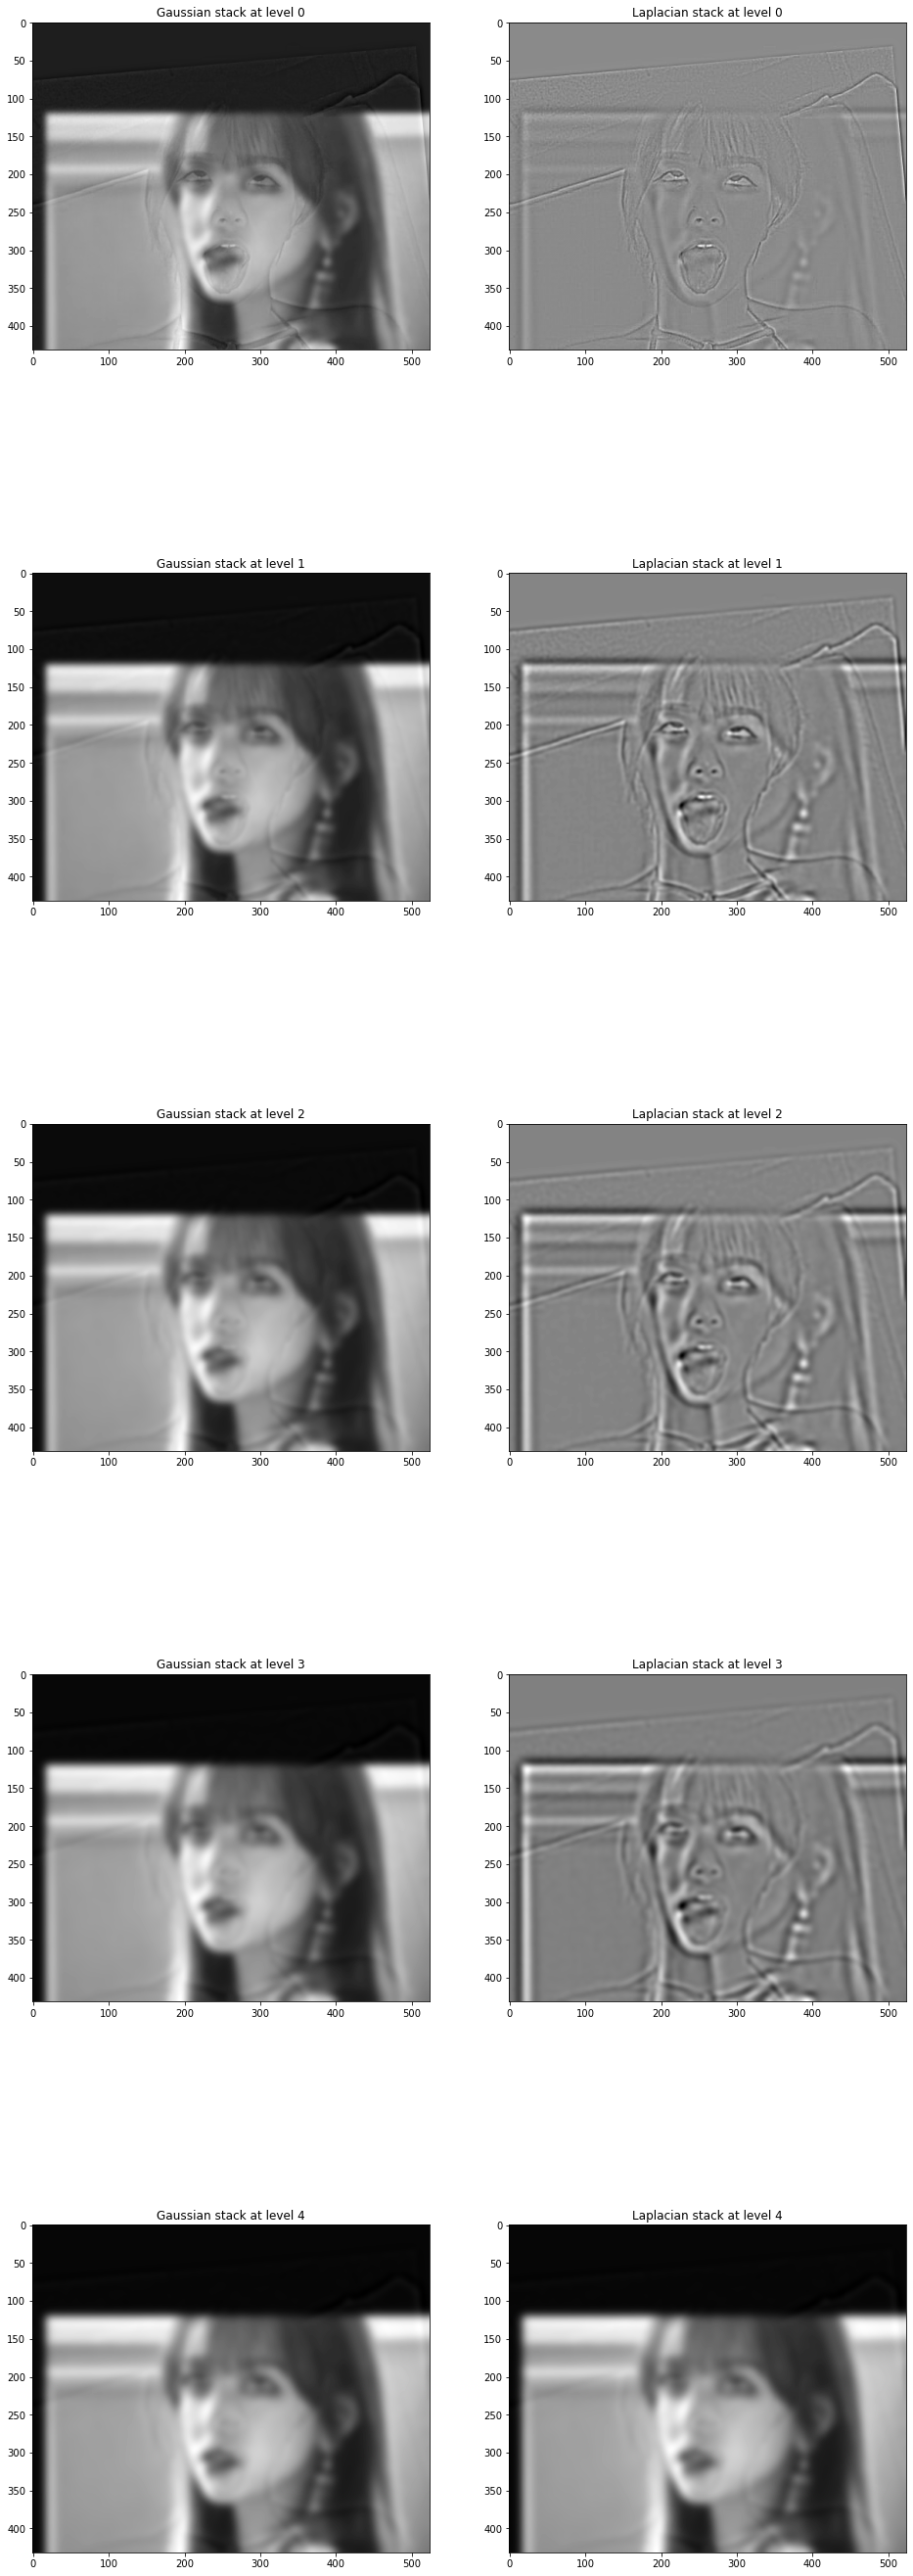

In [194]:
gs,ls = pyramids(img_hybrid,5)
fig,ax = plt.subplots(nrows=len(gs),ncols=2,figsize=(16,10*len(gs)))
for i,(g,l) in enumerate(zip(gs,ls)):
    if len(g.shape)==2:
        ax[i,0].imshow(g,cmap='gray')
    else:
        ax[i,0].imshow(g)
    ax[i,0].set_title('Gaussian stack at level {}'.format(i))
    if len(l.shape)==2:
        ax[i,1].imshow(l,cmap='gray')
    else:
        ax[i,1].imshow(l)
    ax[i,1].set_title('Laplacian stack at level {}'.format(i))

#### Part 2.4: Multiresolution Blending (a.k.a. the oraple!)

In [196]:
N = 10
sig = 2.0
def pyramids(img,N=10,sig=2.0):
    g = gauss2D(sigma=sig)
    gs = []
    ls = []
    gs.append(img)
    for i in range(1,N):
        curr = gs[-1]
        if len(img.shape)==3:
            gs.append(ndimage.convolve(curr,g[:,:,np.newaxis],mode='reflect'))
        else:
            gs.append(ndimage.convolve(curr,g,mode='reflect'))
    for i in range(N-1):
        ls.append(gs[i]-gs[i+1])
    ls.append(gs[-1])
    return gs,ls

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


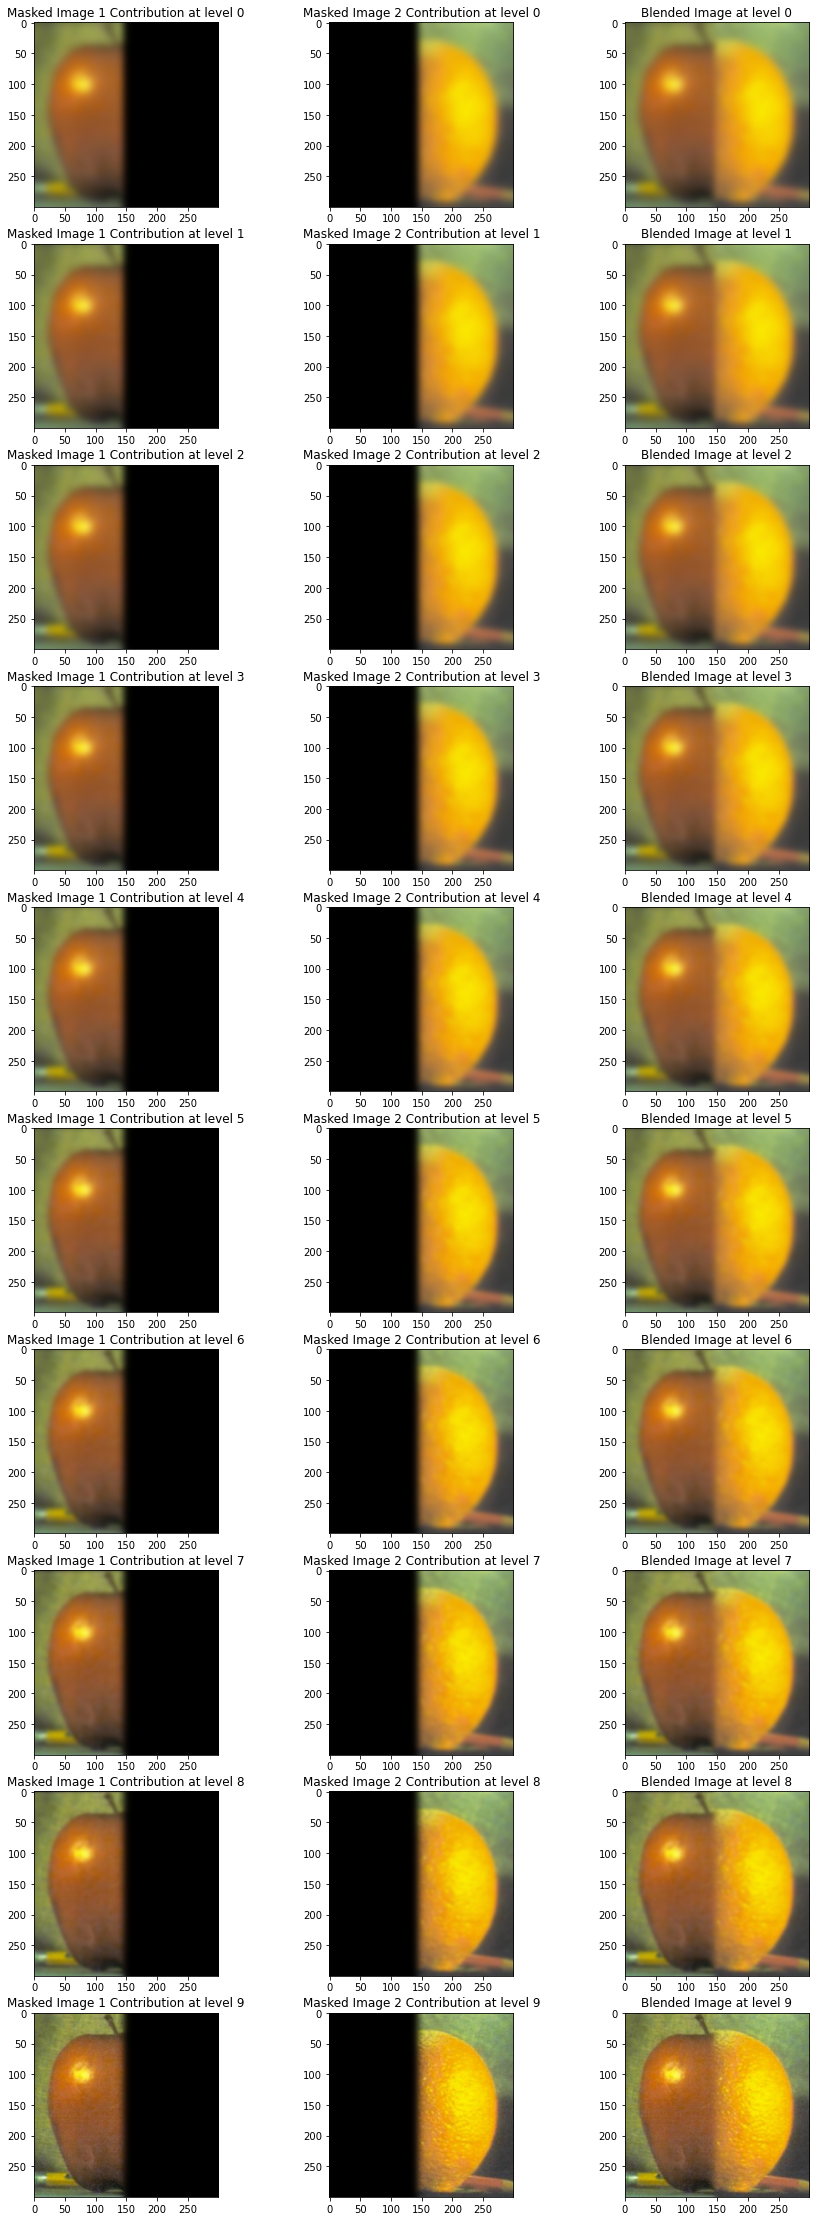

In [198]:
img1 = skio.imread('spline/apple.jpeg')
img2 = skio.imread('spline/orange.jpeg')
img1 = sk.img_as_float(img1)
img2 = sk.img_as_float(img2)
N = 10
# example of a horizontal splitting mask, I locate the potision manually
mw = 145.0
mask = np.zeros(img1.shape)
mask[:,:int(mw),:] = np.ones(img1[:,:int(mw),:].shape)

mask_stack = pyramids(mask,N)[0]
img1_lap = pyramids(img1,N)[1]
img2_lap = pyramids(img2,N)[1]

fig,ax = plt.subplots(nrows=N,ncols=3,figsize=(15,4*N))
for i in range(N):
    k1,k2 = img1_lap[N-1-i]*mask_stack[N-1-i], img2_lap[N-1-i]*(1-mask_stack[N-1-i])
    if i==0:
        k3 = k1+k2
        c1 = k1
        c2 = k2
    else:
        k3 += k1+k2
        c1+=k1
        c2+=k2
    
    ax[i,0].imshow(c1)
    ax[i,0].set_title('Masked Image 1 Contribution at level {}'.format(i))
    ax[i,1].imshow(c2)
    ax[i,1].set_title('Masked Image 2 Contribution at level {}'.format(i))
    ax[i,2].imshow(k3)
    ax[i,2].set_title('Blended Image at level {}'.format(i))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

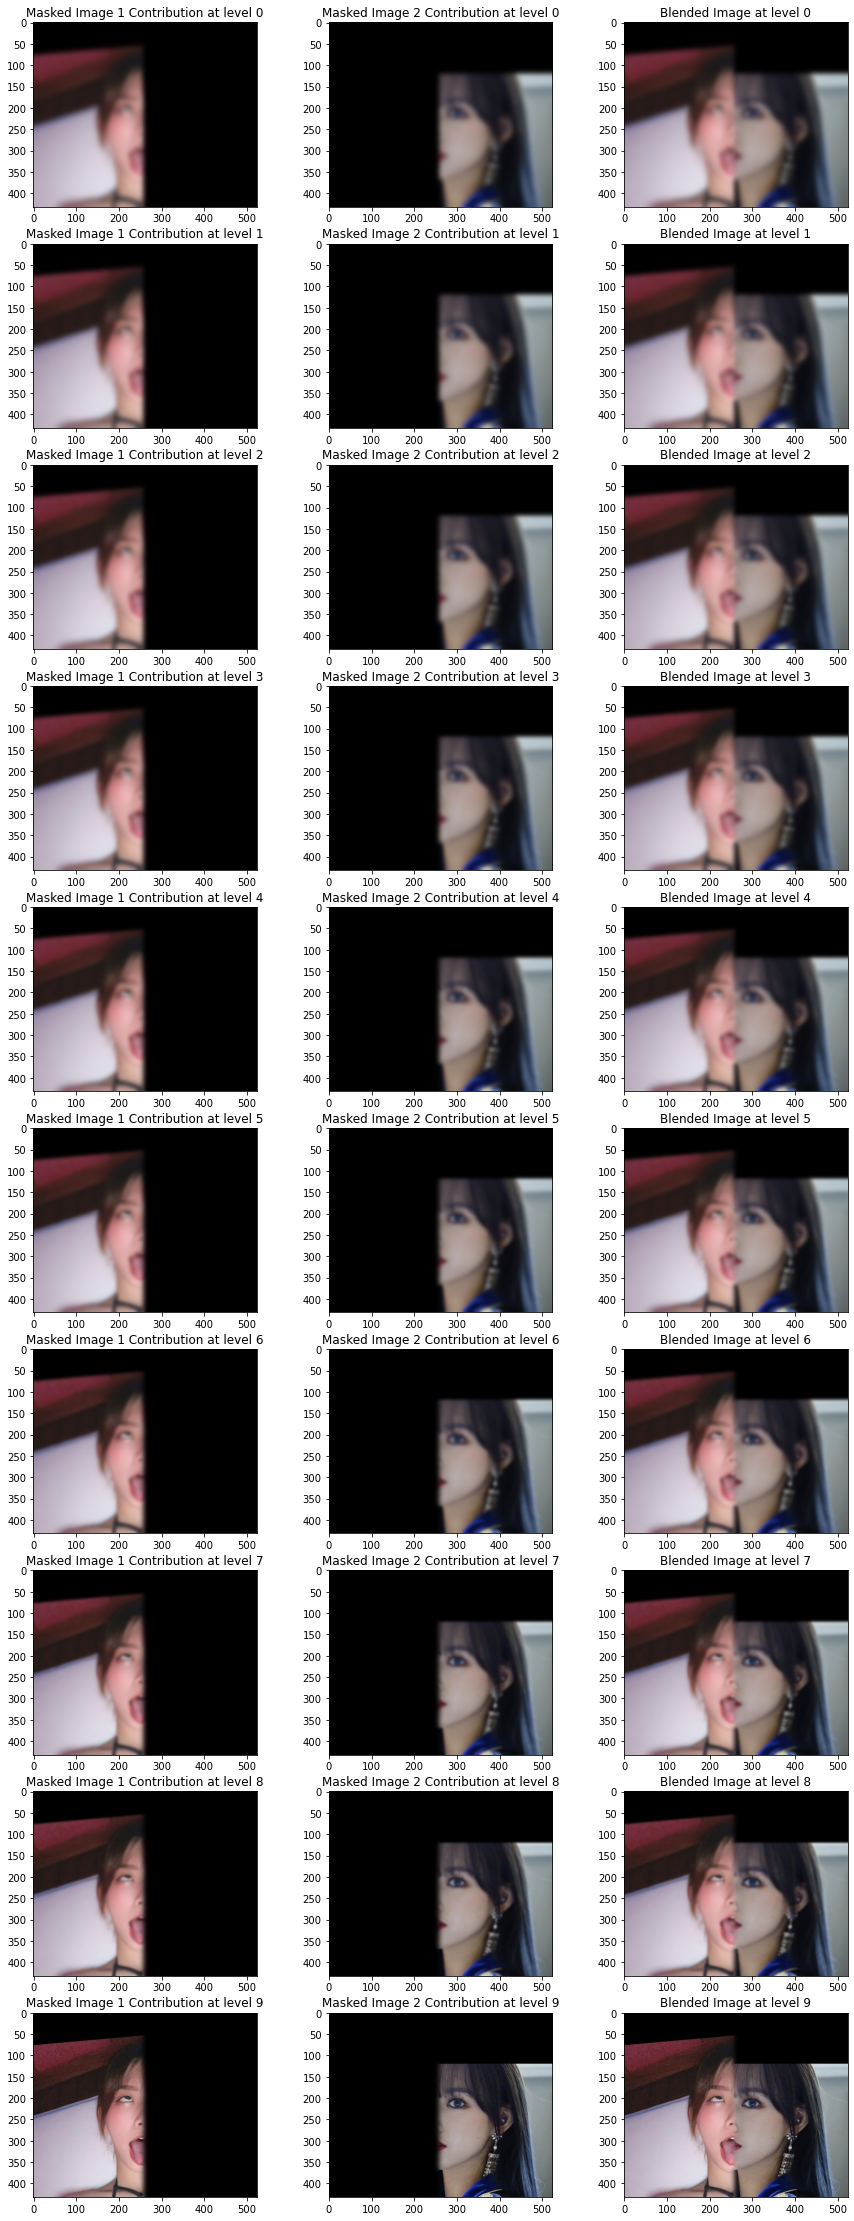

In [197]:
img1 = skio.imread('hybrid/alimg1-2.jpg')
img2 = skio.imread('hybrid/alimg2-2.jpg')
img1 = sk.img_as_float(img1)
img2 = sk.img_as_float(img2)
N = 10
# example of a horizontal splitting mask, I locate the potision manually
mw,mh = (258.5779220779221, 206.8506493506493)
mask = np.zeros(img1.shape)
mask[:,:int(mw),:] = np.ones(img1[:,:int(mw),:].shape)

mask_stack = pyramids(mask,N)[0]
img1_lap = pyramids(img1,N)[1]
img2_lap = pyramids(img2,N)[1]

fig,ax = plt.subplots(nrows=N,ncols=3,figsize=(15,4*N))
for i in range(N):
    k1,k2 = img1_lap[N-1-i]*mask_stack[N-1-i], img2_lap[N-1-i]*(1-mask_stack[N-1-i])
    if i==0:
        k3 = k1+k2
        c1 = k1
        c2 = k2
    else:
        k3 += k1+k2
        c1+=k1
        c2+=k2
    
    ax[i,0].imshow(c1)
    ax[i,0].set_title('Masked Image 1 Contribution at level {}'.format(i))
    ax[i,1].imshow(c2)
    ax[i,1].set_title('Masked Image 2 Contribution at level {}'.format(i))
    ax[i,2].imshow(k3)
    ax[i,2].set_title('Blended Image at level {}'.format(i))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

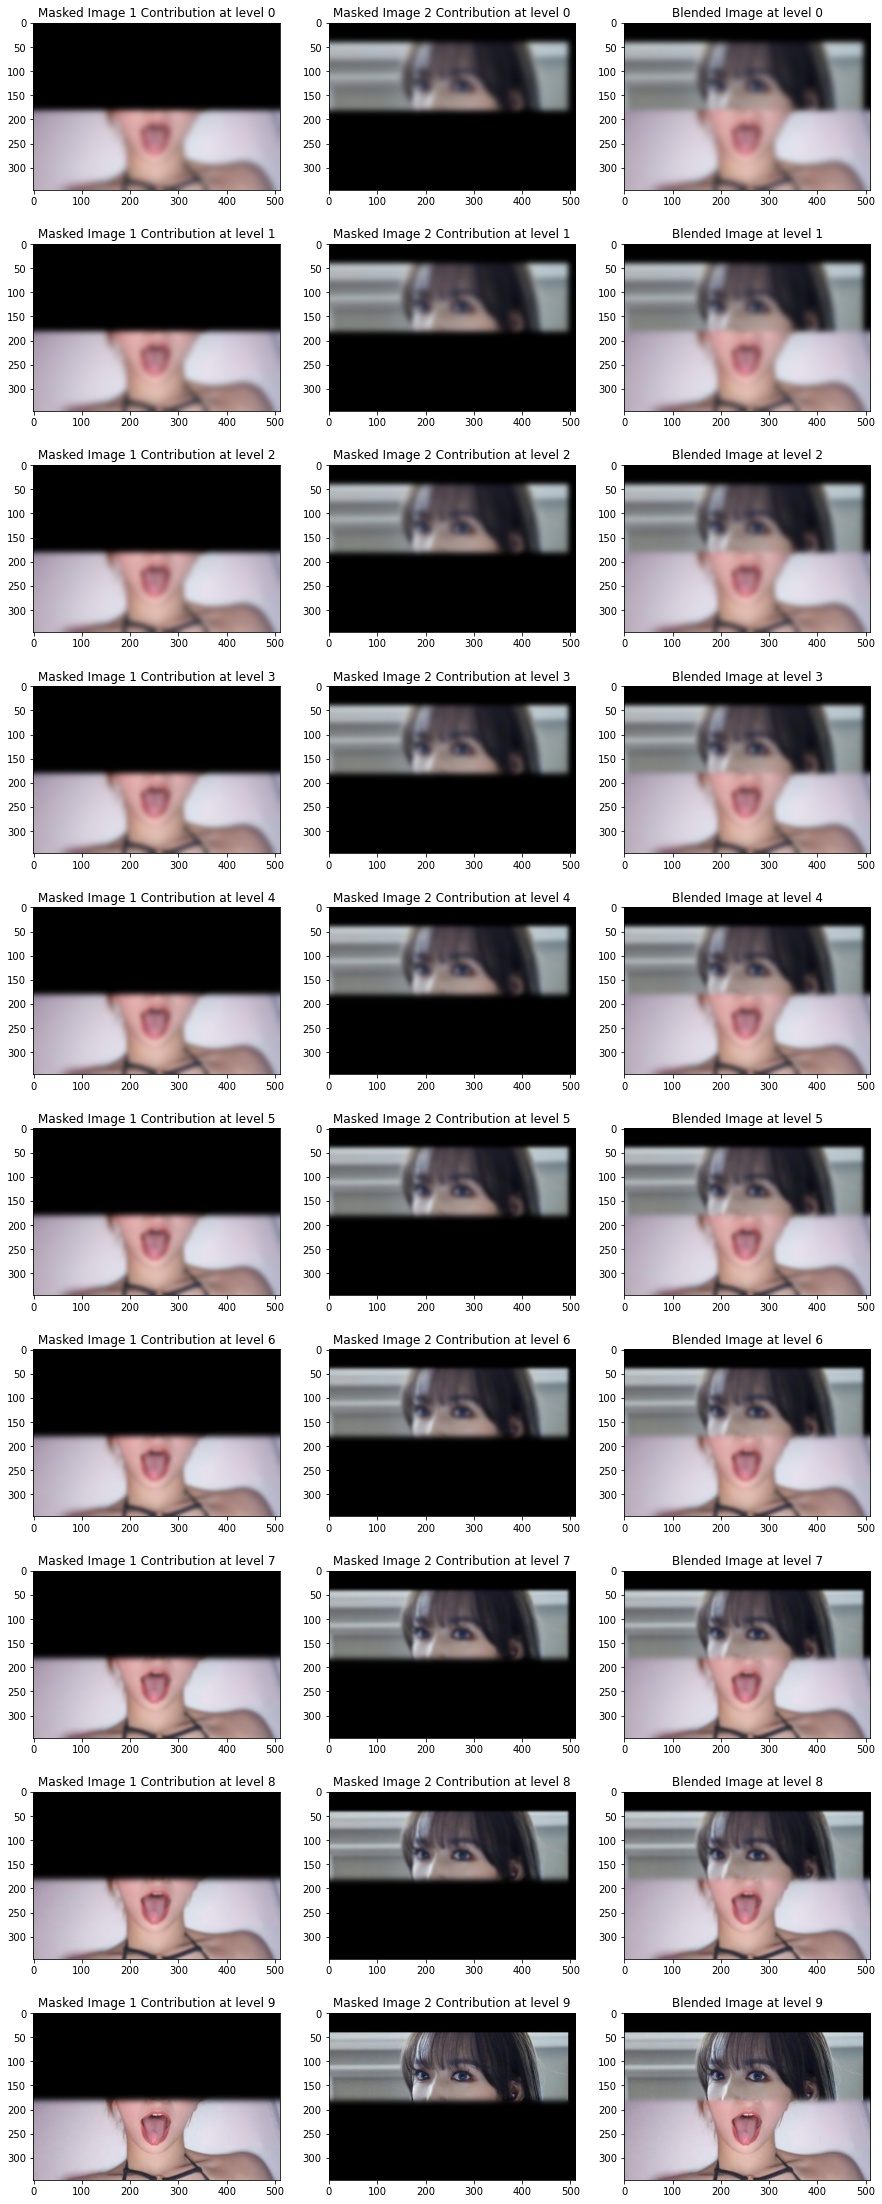

In [202]:
img1 = skio.imread('hybrid/alimg1-3.jpg')
img2 = skio.imread('hybrid/alimg2-3.jpg')
img1 = sk.img_as_float(img1)
img2 = sk.img_as_float(img2)
N = 10
# example of a horizontal splitting mask, I locate the potision manually
mh = img1.shape[0]-164.0
mask = np.zeros(img1.shape)
mask[int(mh):,:,:] = np.ones(img1[int(mh):,:,:].shape)

mask_stack = pyramids(mask,N)[0]
img1_lap = pyramids(img1,N)[1]
img2_lap = pyramids(img2,N)[1]

fig,ax = plt.subplots(nrows=N,ncols=3,figsize=(15,4*N))
for i in range(N):
    k1,k2 = img1_lap[N-1-i]*mask_stack[N-1-i], img2_lap[N-1-i]*(1-mask_stack[N-1-i])
    if i==0:
        k3 = k1+k2
        c1 = k1
        c2 = k2
    else:
        k3 += k1+k2
        c1+=k1
        c2+=k2
    
    ax[i,0].imshow(c1)
    ax[i,0].set_title('Masked Image 1 Contribution at level {}'.format(i))
    ax[i,1].imshow(c2)
    ax[i,1].set_title('Masked Image 2 Contribution at level {}'.format(i))
    ax[i,2].imshow(k3)
    ax[i,2].set_title('Blended Image at level {}'.format(i))